<a href="https://colab.research.google.com/github/Sujatha2108/OIBSIP/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
url = '/content/archive (1).zip'
csv_file_name = 'Unemployment in India.csv'
with zipfile.ZipFile(url, 'r') as zip_ref:
    with zip_ref.open(csv_file_name) as csv_file:
        df = pd.read_csv(csv_file)

In [ ]:
print("Dataset Info:")
df.info()
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB

First 5 rows of the dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1 

In [ ]:
df.describe(include='all')

,Region,date,frequency,Unemployment_rate,Employed,Labour_participation_rate,area
count,740,740,740,740.000000,7.400000e+02,740.000000,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.787946,7.204460e+06,42.630122,NaN
std,NaN,NaN,NaN,10.721298,8.087988e+06,8.111094,NaN
min,NaN,NaN,NaN,0.000000,4.942000e+04,13.330000,NaN
25%,NaN,NaN,NaN,4.657500,1.190404e+06,38.062500,NaN
50%,NaN,NaN,NaN,8.350000,4.744178e+06,41.160000,NaN
75%,NaN,NaN,NaN,15.887500,1.127549e+07,45.505000,NaN


In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [ ]:
df=df.rename(columns={df.columns[0]:'Region',df.columns[3]:'Unemployment_rate',df.columns[4]:'Employed',df.columns[5]:'Labour_participation_rate',df.columns[6]:'area'})
df

,Region,date,frequency,Unemployment_rate,Employed,Labour_participation_rate,area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-24-1a4a07ad2efc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y='Unemployment_rate', palette='viridis')


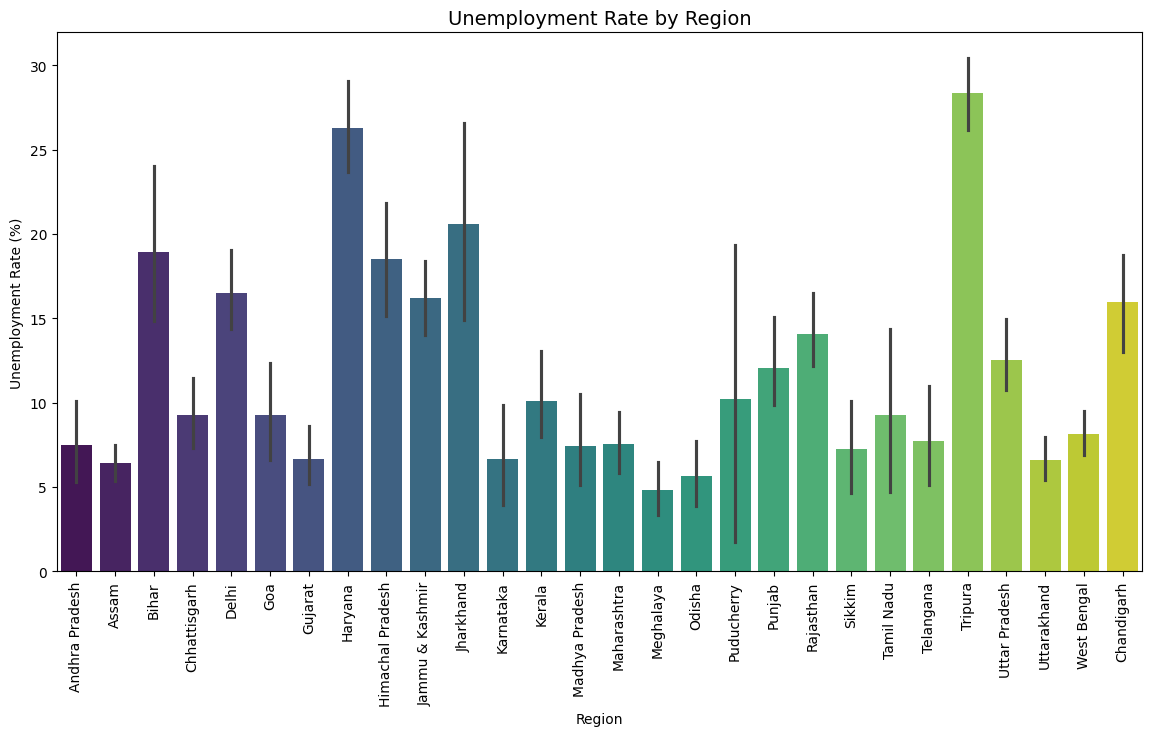

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(data=df, x='Region', y='Unemployment_rate', palette='viridis')
plt.title('Unemployment Rate by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()



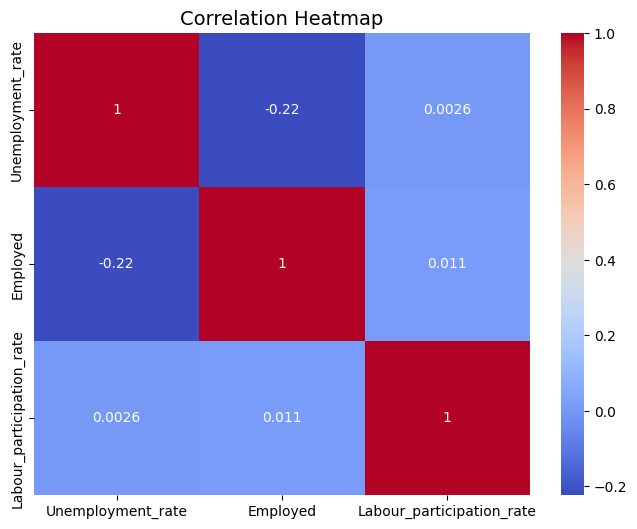

In [ ]:
plt.figure(figsize=(8,6))
numerical_df = df.select_dtypes(include=['float64', 'int64']) #select only numeric columns
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

<Axes: ylabel='Employed'>

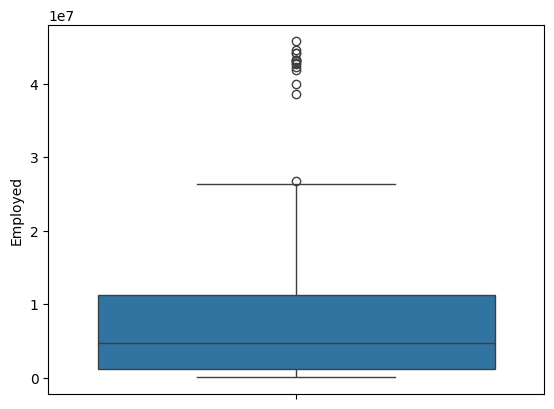

In [ ]:
sns.boxplot(df['Employed'])
